In [6]:
import ROOT
import numpy as np
import time as time

# Count the time
start_time = time.time()

# Load the file and get the tree
f = ROOT.TFile.Open("SiHitValid_s3654.root", "READ")
tree = f.Get("SiHGTD")
print("The loaded tree 'hgtdHits' contains %d events" % tree.GetEntries())

# Print out the objects and branches
f.ls()
tree.Print()  

# Create histograms
histo_hits = ROOT.TH1F("Hits histo", "HGTD hits vs eta; |eta|; Number of hits", 50, 2.39, 2.81) 
histo_per_interaction = ROOT.TH1F("Histo_hits_per_event", "HGTD hits for %d interactions; Number of hits; Frequency"%tree.GetEntries(), 50, 0., 1100.) 

eventCount = 0
printDetailsEventMax=100

# Number of hits that fall inside the acceptance conditions
hits_per_interaction = np.zeros(100)


# Loop through each event in the tree
for event in tree:
    
    printEventDetails = (eventCount < printDetailsEventMax) 
    print("eventCount = %d, printEventDetails = %s" % (eventCount, str(printEventDetails)))
    
    hits_count = 0
    if printEventDetails:
        print("--->Number of HGTD hits: %d" % len(event.HGTD_x)) 
        print ("Looping through all the Hits...")
        # For each event, loop threough every hit and check acceptance conditions
        for h in range (len(event.HGTD_x)):
            r = event.HGTD_r[h] #radial coordinate of the hit 
            z = event.HGTD_z[h] #zeta coordinate (along beamline) of the hit
            eta = -np.log((r/z)/2) 
            if abs(eta) > 2.4 and abs(eta) < 2.8 and abs(z) < 3460: #acceptance on the detector, z: get two layers not 4 (z>3460mm)
                hits_count += 1
                histo_hits.Fill(eta)
                
        
    print("Hits inside acceptance: %d"%hits_count)
    hits_per_interaction[eventCount]= hits_count
    
    eventCount += 1 

# Calculate the CPU time
hours, rem = divmod(time.time()-start_time, 3600)
minutes, seconds = divmod(rem, 60)
print("Computation done!\nCPU time: %d hours, %d minutes and %d seconds" %(hours, minutes,seconds))

The loaded tree 'hgtdHits' contains 100 events
eventCount = 0, printEventDetails = True
--->Number of HGTD hits: 1564
Looping through all the Hits...
Hits inside acceptance: 103
eventCount = 1, printEventDetails = True
--->Number of HGTD hits: 1470
Looping through all the Hits...
Hits inside acceptance: 86
eventCount = 2, printEventDetails = True
--->Number of HGTD hits: 2679
Looping through all the Hits...
Hits inside acceptance: 203
eventCount = 3, printEventDetails = True
--->Number of HGTD hits: 1257
Looping through all the Hits...
Hits inside acceptance: 114
eventCount = 4, printEventDetails = True
--->Number of HGTD hits: 2243
Looping through all the Hits...
Hits inside acceptance: 87
eventCount = 5, printEventDetails = True
--->Number of HGTD hits: 2046
Looping through all the Hits...
Hits inside acceptance: 104
eventCount = 6, printEventDetails = True
--->Number of HGTD hits: 2512
Looping through all the Hits...
Hits inside acceptance: 177
eventCount = 7, printEventDetails = Tr

<ipython-input-6-715c1b28d076>:42: RuntimeWarning: invalid value encountered in log
  eta = -np.log((r/z)/2)


Hits inside acceptance: 198
eventCount = 17, printEventDetails = True
--->Number of HGTD hits: 1788
Looping through all the Hits...
Hits inside acceptance: 75
eventCount = 18, printEventDetails = True
--->Number of HGTD hits: 4385
Looping through all the Hits...
Hits inside acceptance: 399
eventCount = 19, printEventDetails = True
--->Number of HGTD hits: 2851
Looping through all the Hits...
Hits inside acceptance: 187
eventCount = 20, printEventDetails = True
--->Number of HGTD hits: 2254
Looping through all the Hits...
Hits inside acceptance: 138
eventCount = 21, printEventDetails = True
--->Number of HGTD hits: 2957
Looping through all the Hits...
Hits inside acceptance: 99
eventCount = 22, printEventDetails = True
--->Number of HGTD hits: 2373
Looping through all the Hits...
Hits inside acceptance: 206
eventCount = 23, printEventDetails = True
--->Number of HGTD hits: 1557
Looping through all the Hits...
Hits inside acceptance: 158
eventCount = 24, printEventDetails = True
--->Numb

Hits inside acceptance: 42
eventCount = 94, printEventDetails = True
--->Number of HGTD hits: 1501
Looping through all the Hits...
Hits inside acceptance: 48
eventCount = 95, printEventDetails = True
--->Number of HGTD hits: 2909
Looping through all the Hits...
Hits inside acceptance: 354
eventCount = 96, printEventDetails = True
--->Number of HGTD hits: 4148
Looping through all the Hits...
Hits inside acceptance: 129
eventCount = 97, printEventDetails = True
--->Number of HGTD hits: 2778
Looping through all the Hits...
Hits inside acceptance: 216
eventCount = 98, printEventDetails = True
--->Number of HGTD hits: 740
Looping through all the Hits...
Hits inside acceptance: 46
eventCount = 99, printEventDetails = True
--->Number of HGTD hits: 3022
Looping through all the Hits...
Hits inside acceptance: 210
Computation done!
CPU time: 0 hours, 0 minutes and 1 seconds
TFile**		SiHitValid_s3654.root	
 TFile*		SiHitValid_s3654.root	
  OBJ: TTree	SiHGTD	SiHGTD : 0 at: 0x551a190
  KEY: TH1D	h_

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


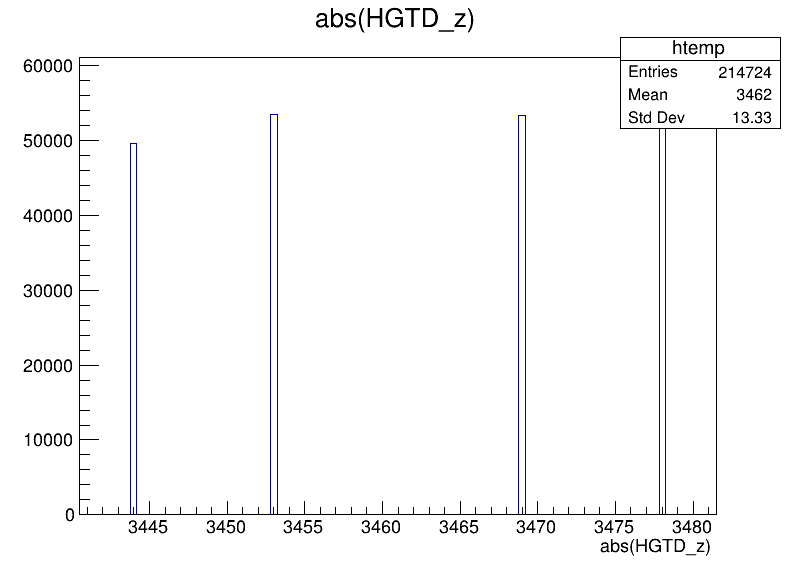

In [8]:
# Draw the 4 layers
c = ROOT.TCanvas("Canvas", "Title", 800, 600)
tree.Draw("abs(HGTD_z)")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


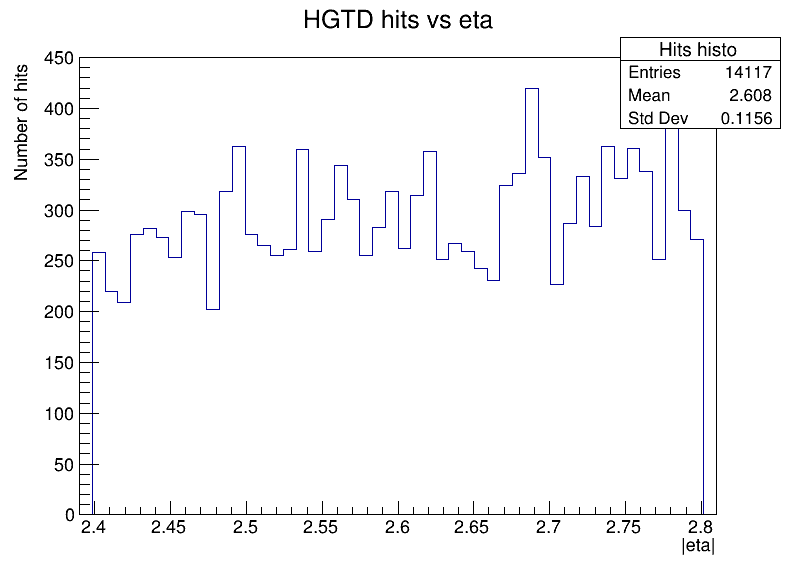

In [9]:
# open a canvas to draw the histogram on
c1 = ROOT.TCanvas("Canvas", "Title", 800, 600)
# draw the histogram
histo_hits.Draw() # draw option "e1" will draw error bars
# open the canvas
c1.Draw()

[103.  86. 203. 114.  87. 104. 177.  54.  95.  95.  41.  27. 221. 105.
 145. 246. 198.  75. 399. 187. 138.  99. 206. 158. 120. 120. 223. 219.
 501.  59. 238. 157.  55.  94. 366. 112. 159. 199. 227. 119.  39.  39.
 107. 125. 175.  17. 189. 134.   6. 160.  66. 124.  45. 100.  39. 527.
  45.  48. 128.  84. 197. 114.  53.  13. 117. 178. 190. 206. 123. 211.
  61. 228. 105. 262. 121. 335. 119.  50.  30. 130. 259.  17.  82.   3.
 194.  79.  79.  46.  87. 204. 139. 264. 248.  42.  48. 354. 129. 216.
  46. 210.]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TH1F::SaveAs>: ROOT file hits-per-interaction_PDF.root has been created
Info in <TCanvas::Print>: pdf file Hits per interaction.pdf has been created


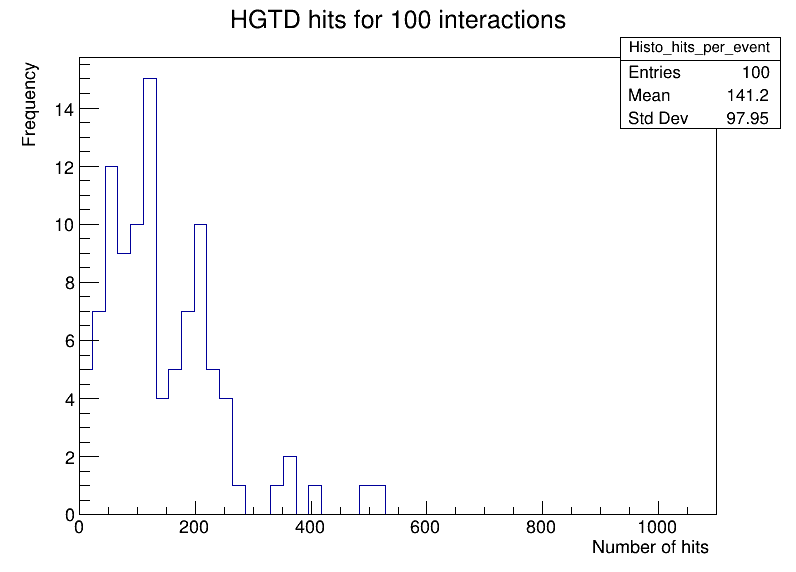

In [10]:
print (hits_per_interaction)

# Fill the histogram with the acceptance hits for each interaction
for i in range (len(hits_per_interaction)):
    histo_per_interaction.Fill(hits_per_interaction[i])

# Plot the histogram
c1 = ROOT.TCanvas("Canvas", "Title", 800, 600)
histo_per_interaction.Draw() 
histo_per_interaction.SaveAs("hits-per-interaction_PDF.root")
c1.Draw()
c1.SaveAs("Hits per interaction.pdf")

[ 53.  25.  98.  62.  48.  65.  83.  33.  56.  57.  18.  11. 147.  28.
  51. 108. 114.  27. 197. 107.  51.  52.  96.  88.  67.  64.  71. 132.
 283.  31. 111.  90.  29.  46. 208.  70.  69.  74. 110.  68.  12.   7.
  35.  45.  76.   9.  64. 115.   3. 107.  45.  70.  24.  45.  25. 238.
  22.  21.  64.  24. 122.  42.  19.   6.  57.  87.  97.  98.  53. 109.
  33. 126.  50. 151.  54. 221.  45.  13.  14.  47. 115.   7.  57.   1.
  93.  42.  46.  17.  33.  77.  74. 116. 139.  17.  29. 139.  69.  87.
  17. 102.]


Info in <TCanvas::Print>: pdf file Hits per interaction.pdf has been created


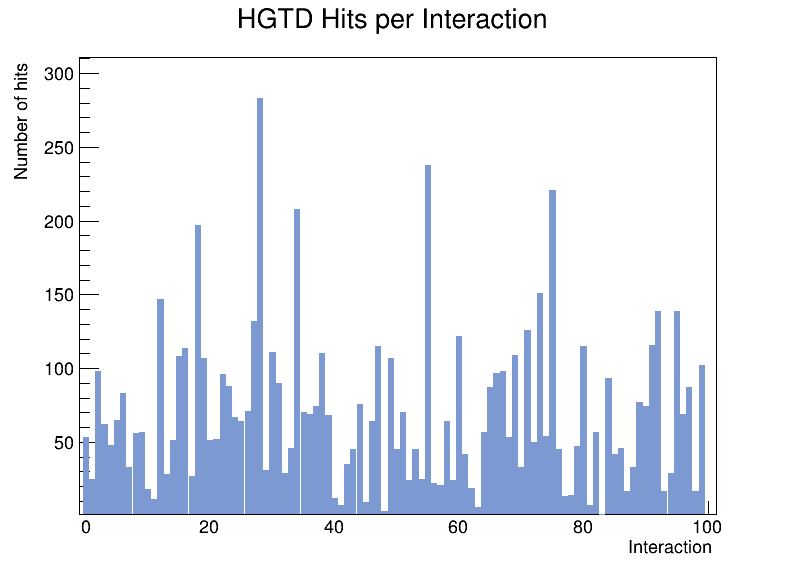

In [4]:
print (hits_per_interaction)
# open a canvas to draw the histogram on
c2 = ROOT.TCanvas("Canvas2", "Title", 800, 600)
x_axis = np.arange(0,100)
g = ROOT.TGraph(len(hits_per_interaction), x_axis.astype(np.double),hits_per_interaction.astype(np.double))
g.SetTitle( "HGTD Hits per Interaction")
g.GetXaxis().SetTitle('Interaction')
g.GetYaxis().SetTitle('Number of hits')
g.GetXaxis().SetRange(-5,93)
g.SetFillColor(38)
g.Draw('AB')

c2.Draw()
c2.SaveAs("Hits per interaction.pdf")